In [119]:
##VERY IMPORTANT OR PLOTS FROM MATPLOT WILL NOT SHOW! IT TOOK AN HOUR FOR ME TO FIGURE THIS OUT!##
%matplotlib inline 
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%config IPCompleter.greedy=True #Turn on AutoComplete
sns.set_style('whitegrid')

#######Temp
from sklearn.decomposition import PCA, KernelPCA
#from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import make_scorer
#from sklearn.grid_search import GridSearchCV
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier
###EndTemp

In [120]:
kobe_df = pd.read_csv("project2Data.csv")

kobe_df.set_index('shot_id', inplace=True)
kobe_df["action_type"] = kobe_df["action_type"].astype('object')
kobe_df["combined_shot_type"] = kobe_df["combined_shot_type"].astype('category')
kobe_df["game_event_id"] = kobe_df["game_event_id"].astype('category')
kobe_df["game_id"] = kobe_df["game_id"].astype('category')
kobe_df["period"] = kobe_df["period"].astype('object')
kobe_df["playoffs"] = kobe_df["playoffs"].astype('category')
kobe_df["season"] = kobe_df["season"].astype('category')
kobe_df["shot_made_flag"] = kobe_df["shot_made_flag"].astype('category')
kobe_df["shot_type"] = kobe_df["shot_type"].astype('category')
kobe_df["team_id"] = kobe_df["team_id"].astype('category')

pd.set_option('display.max_columns', None) #Displays All the columns
print("Dataset has {} entries and {} features".format(*kobe_df.shape))

# preview data
kobe_df.head()

Dataset has 25697 entries and 28 features


,recId,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,attendance,arena_temp,avgnoisedb
shot_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,14707,69,94.06
3,2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,14707,69,94.06
4,3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,14707,69,94.06
5,4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,14707,69,94.06
6,5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,0,2000-01,32,14,0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,14707,69,94.06


In [121]:
pandas_profiling.ProfileReport(kobe_df)

Number of variables,29
Number of observations,25697
Total Missing (%),0.0%
Total size in memory,4.4 MiB
Average record size in memory,181.1 B
Numeric,11
Categorical,14
Boolean,0
Date,0
Text (Unique),0
Rejected,4


In [122]:
profile = pandas_profiling.ProfileReport(kobe_df)
profile.to_file(outputfile="data_analysis.html")

You can see a HTML version of the data located [here](data_analysis.html).

In [123]:
# check how many missing values each feature contains
#kobe_df.isnull().sum(axis = 0)

In [124]:
target = kobe_df['shot_made_flag']

# Remove some columns
kobe_df.drop('team_id', axis=1, inplace=True) # Always one number
#data_cl.drop('lat', axis=1, inplace=True) # Correlated with loc_x
kobe_df.drop('lon', axis=1, inplace=True) # Correlated with loc_x
#kobe_df.drop('period', axis=1, inplace=True) # Highly Correlated with game_event_id
#kobe_df.drop('playoffs', axis=1, inplace=True) # Highly Correlated with game_id
kobe_df.drop('team_name', axis=1, inplace=True) # Always LA Lakers
kobe_df.drop('recId', axis=1, inplace=True) # Highly Correlated with shot_Id
#kobe_df.drop('shot_made_flag', axis=1, inplace=True)#Target

## Detect and remove outliers

In [125]:
def detect_outliers(series, whis=1.5):
    q75, q25 = np.percentile(series, [75 ,25])
    iqr = q75 - q25
    return ~((series - series.median()).abs() <= (whis * iqr))

## For now - do not remove anything

In [126]:
pd.set_option('display.max_columns', None) #Displays All the columns
print("Dataset has {} entries and {} features".format(*kobe_df.shape))

# preview data
kobe_df.head()

Dataset has 25697 entries and 24 features


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,matchup,opponent,attendance,arena_temp,avgnoisedb
shot_id,,,,,,,,,,,,,,,,,,,,,,,,
2,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,10,1,0,2000-01,22,15,0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,10/31/00,LAL @ POR,POR,14707,69,94.06
3,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,7,1,0,2000-01,45,16,1,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,10/31/00,LAL @ POR,POR,14707,69,94.06
4,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,6,1,0,2000-01,52,22,0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,10/31/00,LAL @ POR,POR,14707,69,94.06
5,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,6,2,0,2000-01,19,0,1,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,10/31/00,LAL @ POR,POR,14707,69,94.06
6,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,9,3,0,2000-01,32,14,0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,10/31/00,LAL @ POR,POR,14707,69,94.06


In [127]:
kobe_df.describe(include=['number'])

,lat,loc_x,loc_y,minutes_remaining,seconds_remaining,shot_distance,attendance,arena_temp,avgnoisedb
count,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000
mean,33.953043,7.148422,91.257345,4.886796,28.311554,13.457096,15040.683621,70.107717,94.951369
std,0.088152,110.073147,88.152106,3.452475,17.523392,9.388725,1076.226662,2.030165,2.281707
min,33.253300,-250.000000,-44.000000,0.000000,0.000000,0.000000,11065.000000,64.000000,88.560000
25%,33.884300,-67.000000,4.000000,2.000000,13.000000,5.000000,14314.000000,69.000000,93.400000
50%,33.970300,0.000000,74.000000,5.000000,28.000000,15.000000,15048.000000,70.000000,94.920000
75%,34.040300,94.000000,160.000000,8.000000,43.000000,21.000000,15738.000000,71.000000,96.490000
max,34.088300,248.000000,791.000000,11.000000,59.000000,79.000000,20845.000000,79.000000,102.430000


In [128]:
kobe_df.dtypes

action_type             object
combined_shot_type    category
game_event_id         category
game_id               category
lat                    float64
loc_x                    int64
loc_y                    int64
minutes_remaining        int64
period                  object
playoffs              category
season                category
seconds_remaining        int64
shot_distance            int64
shot_made_flag        category
shot_type             category
shot_zone_area          object
shot_zone_basic         object
shot_zone_range         object
game_date               object
matchup                 object
opponent                object
attendance               int64
arena_temp               int64
avgnoisedb             float64
dtype: object

# Data Visualization
See target class distribution

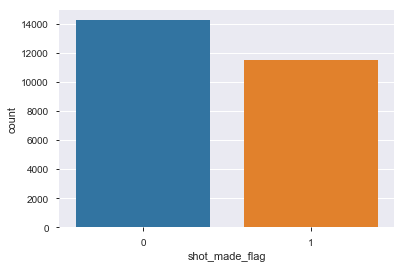

In [129]:
import seaborn as sns
%matplotlib inline
#sns.set(style="darkgrid")
#ax = plt.axes()
#sns.countplot(x='shot_made_flag', data=kobe_df, ax=ax);
#ax.set_title('Target class distribution')
#plt.show()

#kobe_df= sns.load_dataset("kobe_df")
ax = sns.countplot(x="shot_made_flag", data=kobe_df)
plt.show()

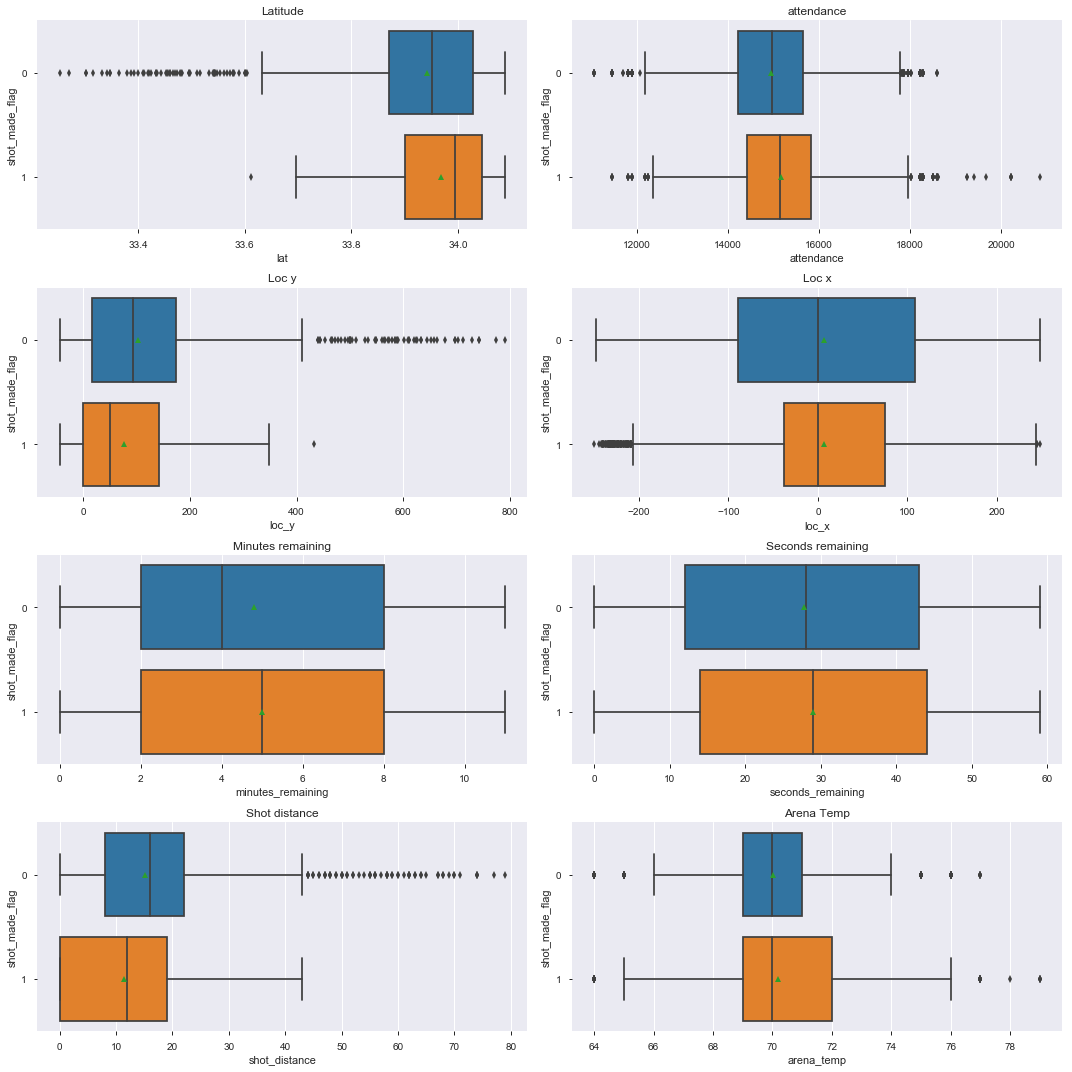

In [136]:
f, axarr = plt.subplots(4, 2, figsize=(15, 15))

sns.boxplot(x='lat', y='shot_made_flag', data=kobe_df, showmeans=True, ax=axarr[0,0])
sns.boxplot(x='attendance', y='shot_made_flag', data=kobe_df, showmeans=True, ax=axarr[0, 1])
sns.boxplot(x='loc_y', y='shot_made_flag', data=kobe_df, showmeans=True, ax=axarr[1, 0])
sns.boxplot(x='loc_x', y='shot_made_flag', data=kobe_df, showmeans=True, ax=axarr[1, 1])
sns.boxplot(x='minutes_remaining', y='shot_made_flag', showmeans=True, data=kobe_df, ax=axarr[2, 0])
sns.boxplot(x='seconds_remaining', y='shot_made_flag', showmeans=True, data=kobe_df, ax=axarr[2, 1])
sns.boxplot(x='shot_distance', y='shot_made_flag', data=kobe_df, showmeans=True, ax=axarr[3, 0])
sns.boxplot(x='arena_temp', y='shot_made_flag', data=kobe_df, showmeans=True, ax=axarr[3, 1])
sns.boxplot(x='avgnoisedb', y='shot_made_flag', data=kobe_df, showmeans=True, ax=axarr[4, 0])

axarr[0, 0].set_title('Latitude')
axarr[0, 1].set_title('attendance')
axarr[1, 0].set_title('Loc y')
axarr[1, 1].set_title('Loc x')
axarr[2, 0].set_title('Minutes remaining')
axarr[2, 1].set_title('Seconds remaining')
axarr[3, 0].set_title('Shot distance')
axarr[3, 1].set_title('Arena Temp')
axarr[4, 0].set_title('Average DB')

plt.tight_layout()
plt.show()

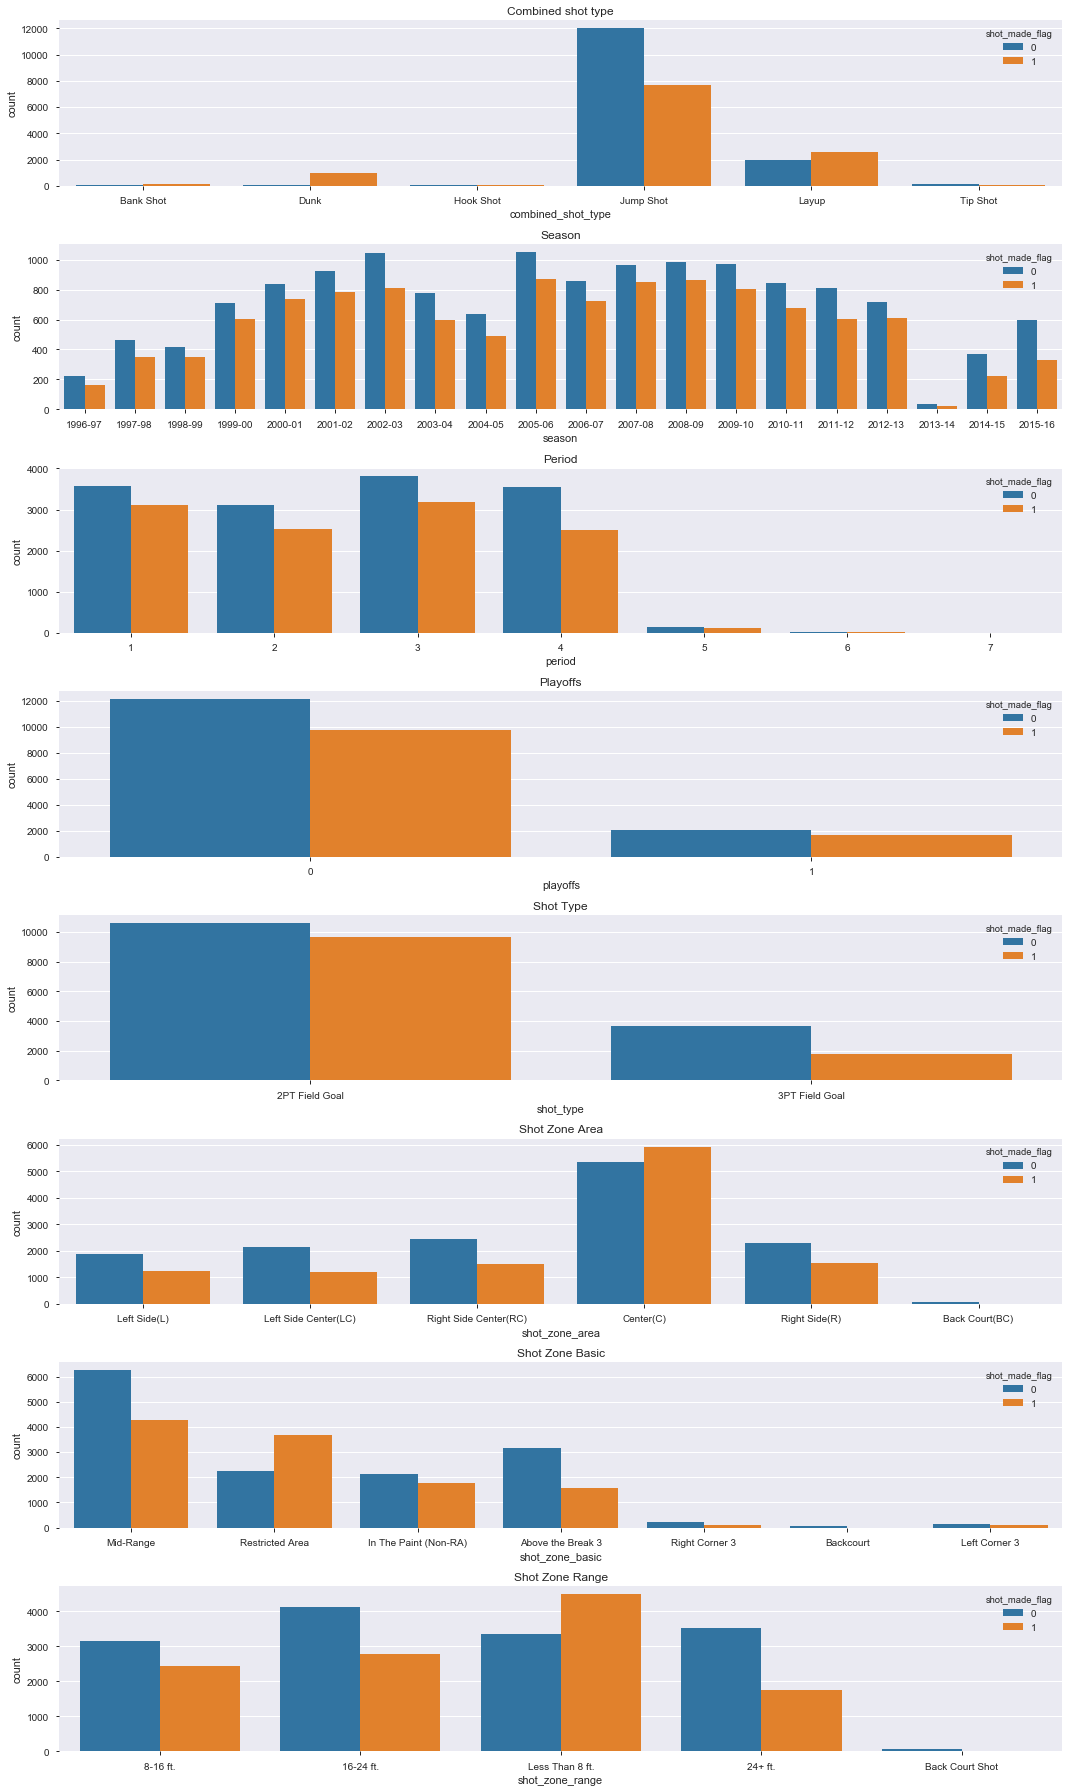

In [131]:
f, axarr = plt.subplots(8, figsize=(15, 25))

sns.countplot(x="combined_shot_type", hue="shot_made_flag", data=kobe_df, ax=axarr[0])
sns.countplot(x="season", hue="shot_made_flag", data=kobe_df, ax=axarr[1])
sns.countplot(x="period", hue="shot_made_flag", data=kobe_df, ax=axarr[2])
sns.countplot(x="playoffs", hue="shot_made_flag", data=kobe_df, ax=axarr[3])
sns.countplot(x="shot_type", hue="shot_made_flag", data=kobe_df, ax=axarr[4])
sns.countplot(x="shot_zone_area", hue="shot_made_flag", data=kobe_df, ax=axarr[5])
sns.countplot(x="shot_zone_basic", hue="shot_made_flag", data=kobe_df, ax=axarr[6])
sns.countplot(x="shot_zone_range", hue="shot_made_flag", data=kobe_df, ax=axarr[7])

axarr[0].set_title('Combined shot type')
axarr[1].set_title('Season')
axarr[2].set_title('Period')
axarr[3].set_title('Playoffs')
axarr[4].set_title('Shot Type')
axarr[5].set_title('Shot Zone Area')
axarr[6].set_title('Shot Zone Basic')
axarr[7].set_title('Shot Zone Range')

plt.tight_layout()
plt.show()

In [112]:
#writing to excel
writer = pd.ExcelWriter('kobe_data_wrangled.xlsx', engine='xlsxwriter')
kobe_df.to_excel(writer, sheet_name='Sheet1')
writer.save()